# Dataset, DataLoader
- 데이터를 처리하여 model에 공급(fit)하기 위하여 파이토치에서 torch.utilis.data.Dataset과 torch.utils.data.DataLoader 클래스를 지원합니다.
    - Dataset : feautre와 model을 저장
    - DataLoader : Dataset을 모델에 공급할 수 있도록하는 클래스

In [1]:
import torch

# torchvision : 파이토치 기반의 CV 도구들이 들어있는 패키지
# torchvision.datasets : Computer vision 관련 예제 데이터 세트

from torchvision import datasets
from torchvision.transforms import ToTensor

In [2]:
train_data = datasets.FashionMNIST(
    root = 'data', # 데이터(이미지를) 저장할 디렉토리
    train = True , # 훈련용 데이터인지 여부
    download = True, 
    transform= ToTensor() # transform : 이미지 변환.
                          # ndarray형식의 이미지를 PyTorch ToTensor로 변환
                          
)

100%|██████████| 26.4M/26.4M [00:09<00:00, 2.74MB/s]


Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 111kB/s]


Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 4.42M/4.42M [00:07<00:00, 622kB/s]


Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 5.15k/5.15k [00:00<?, ?B/s]

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



In [3]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
type(train_data)

torchvision.datasets.mnist.FashionMNIST

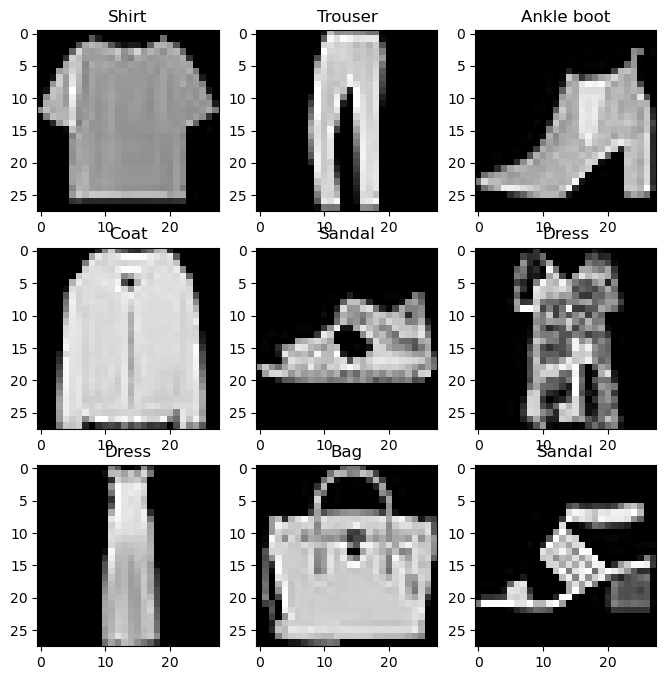

In [5]:
import matplotlib.pyplot as plt

labels_map = {
    0 : "T-shirt/top",
    1 : "Trouser",
    2 : "Pullover",
    3 : "Dress",
    4 : "Coat",
    5 : "Sandal",
    6 : "Shirt",
    7 : "Sneaker",
    8 : "Bag",
    9 : "Ankle boot"
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
  sample_idx = torch.randint(len(train_data), size=(1, )).item()

  # Dataset에서 데이터를 뽑을 예정. 이 때 Dataset의 구조는 feature, target이 같이 들어있다.
  feature, target = train_data[sample_idx]
  figure.add_subplot(rows, cols, i)

  plt.title(labels_map[target])
  plt.imshow(feature.squeeze(), cmap='gray')

plt.show()

# DataLoader 만들기

In [6]:
batch_size = 64

In [7]:
from torch.utils.data import DataLoader

# shuffle : 1에폭 당 데이터 로더에서 데이터를 읽어 올 때 마다 랜덤하게 섞게 된다.
#   shuffle을 걸어주면 모델이 데이터를 조금 더 어렵게 학습한다.
train_dataloader = DataLoader(
    train_data, # 데이터 로더에 데이터 세트를 등록
    batch_size=batch_size,
    shuffle=True
)

In [8]:
# 테스트 데이터 불러오기
test_data = datasets.FashionMNIST(
    root='data',
    train=False, # 테스트 데이터 다운로드
    download=True,
    transform=ToTensor()
)

In [9]:
# 테스트 데이터 세트는 굳이 섞을 필요가 없다.
# 어차피 전체 데이터에 대한 성능(loss, accuracy)를 확인만 하기 때문에
test_dataloader = DataLoader(
    test_data,
    batch_size=batch_size,
    shuffle=False
)

# DataLoader 시각화
- DataLoader 객체는 파이썬의 Generator 자료 구조에 해당하며, iterator를 직접 움직여 가면서 데이터를 iterator 할 수 있습니다.
- 이 때 설정한 Batch_size만큼 데이터를 수출해 냅니다.

In [10]:
train_features, train_labels = next(iter(train_dataloader))

print(train_features.size())
print(train_labels.size())

torch.Size([64, 1, 28, 28])
torch.Size([64])


In [11]:
train_features[0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0118, 0.0000, 0.0000, 0.5098, 0.8118, 0.8431, 0.8745, 0.8039,
          0.6196, 0.0784, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0078, 0.0000, 0.6745, 0.9647, 0.8706, 0.8314, 0.7882, 0.8510,
          0.9216, 0.8902, 0.1373, 0.0000, 0.0157, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0078, 0.0000, 0.0000, 0.0196,
          0.0000, 0.0353, 0.8784, 0.8471, 0.8824, 0.8588, 0.8431, 0.8980,
          0.8588, 0.9020, 0.7686, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0118, 0.0039, 0.0196, 0.0000,
          0.0000, 0.0000, 0.8784, 0.8745, 0.8353, 0.8824, 0.9569, 0.8667,
          0.8078, 0.9176, 0.6980, 0.0000, 0.0000, 0.0157,

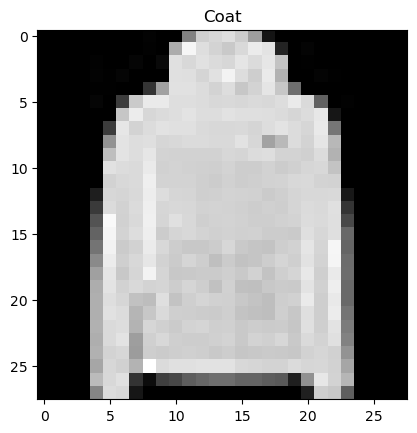

In [12]:
feature = train_features[0].squeeze()
label = train_labels[0].item() # 텐서 형식이 아닌, 스칼라만 가져올 때는 item() 사용

plt.title(labels_map[label])
plt.imshow(feature, cmap='gray')
plt.show()

# CustomDataset ⭐️
`torch.utils.data.Dataset` 클래스를 상속받으면 개발자가 직접 파이토치 Dataset을 구성할 수 있습니다. 필수로 오버라이딩 해야하는 메소드는 다음과 같습니다.
- `__init__` : 생성자 입니다. Dataset 에 담을 데이터, 전처리가 필요하다면 `transform` 객체를 같이 받습니다.
- `__len__` : Dataset에 있는 데이터의 개수
- `__getitem__` : 몇 번째 데이터를 가져올지를 정의하는 함수입니다. 만약 `transform`이 있다면 변환 처리까지 해주게 됩니다.

In [24]:
class CustomDataset(torch.utils.data.Dataset):
# feautre만 있든, label과 같이 있든 데이터가 입력이 되어야 한다.
# transform : 선택. 있을 수도 있고 없을수도 있다. / 데이터 세트를 구성하면서 데이터를 번형(전처리)시킬 클래스
  def __init__(self, feature, transform=None):
    self.features = feature
    self.transform = transform
    # 중요한 거.
    self.len = feature.shape[0]

  def __len__(self):
    # 데이터 세트의 전체 길이를 반환.
    print(" CustomDataset __len__() called")
    return self.len

  def __getitem__(self, idx):
    # __getitem__ 메소드는 연산자 오버라이딩이 되어있다.
    # [ ] 기호를 이용해서 아이템을 뽑아낼 때 호출되는 매직 메소드
    print("CustomDataset.__getitem__() called")    
    feature = self.features[idx]
    # if self.transform :
    #   feature = self.transform()
      
    return feature

In [25]:
# 사용자 정의 데이터 변환기(transform) 만들기
def square(data) :
    # 데이터를 제곱하는 데이터 변환기
    return data ** 2

In [26]:
# 개발자가 직접 만든 함수를 파이토치의 변환기로 등록 -> UDF(User Define Function)
import torchvision.transforms as tr

custom_transform = tr.Compose([square])
custom_transform

Compose(
    <function square at 0x000001A8B1C86F20>
)

In [27]:
# 테스트
import numpy as np

sample_data = np.arange(10)
custom_ds = CustomDataset(sample_data, transform=custom_transform)
custom_ds

In [28]:
len(custom_ds) # custom_ds.__len__()

 CustomDataset __len__() called


10

In [29]:
custom_ds[4]

CustomDataset.__getitem__() called


4

In [30]:
custom_dl = DataLoader(
    custom_ds,
    batch_size = 2
)
custom_dl

In [31]:
data = next(iter(custom_dl))
data

 CustomDataset __len__() called
CustomDataset.__getitem__() called
CustomDataset.__getitem__() called


tensor([0, 1], dtype=torch.int32)

In [32]:
for _ in range(5):
  for data in custom_dl:
    print(data)

  print("====")

 CustomDataset __len__() called
CustomDataset.__getitem__() called
CustomDataset.__getitem__() called
tensor([0, 1], dtype=torch.int32)
CustomDataset.__getitem__() called
CustomDataset.__getitem__() called
tensor([2, 3], dtype=torch.int32)
CustomDataset.__getitem__() called
CustomDataset.__getitem__() called
tensor([4, 5], dtype=torch.int32)
CustomDataset.__getitem__() called
CustomDataset.__getitem__() called
tensor([6, 7], dtype=torch.int32)
CustomDataset.__getitem__() called
CustomDataset.__getitem__() called
tensor([8, 9], dtype=torch.int32)
====
 CustomDataset __len__() called
CustomDataset.__getitem__() called
CustomDataset.__getitem__() called
tensor([0, 1], dtype=torch.int32)
CustomDataset.__getitem__() called
CustomDataset.__getitem__() called
tensor([2, 3], dtype=torch.int32)
CustomDataset.__getitem__() called
CustomDataset.__getitem__() called
tensor([4, 5], dtype=torch.int32)
CustomDataset.__getitem__() called
CustomDataset.__getitem__() called
tensor([6, 7], dtype=torch.in